In [1]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the required dataset
df1 = pd.read_csv("season-2223_csv.csv")
df2 = pd.read_csv("season-2122_csv.csv")
df3 = pd.read_csv("season-2021_csv.csv")
df4 = pd.read_csv("season-1920_csv.csv")
df5 = pd.read_csv("season-1819_csv.csv")
df6 = pd.read_csv("season-1718_csv.csv")
df7 = pd.read_csv("season-1617_csv.csv")
df8 = pd.read_csv("season-1516_csv.csv")
df9 = pd.read_csv("season-1415_csv.csv")
df10 = pd.read_csv("season-1314_csv.csv")
df11 = pd.read_csv("season-1213_csv.csv")
df12 = pd.read_csv("season-1112_csv.csv")
df13 = pd.read_csv("season-1011_csv.csv")
df14 = pd.read_csv("season-0910_csv.csv")
df15 = pd.read_csv("season-0809_csv.csv")
df16 = pd.read_csv("season-0708_csv.csv")
df17 = pd.read_csv("season-0607_csv.csv")
df18 = pd.read_csv("season-0506_csv.csv")

In [3]:
#Merging them 
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18])

In [4]:
# Resetting indexes
df = df.reset_index(drop=True)

In [5]:
# Checking the head
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,SJA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Check for any missing values
df.isna().sum()

Div            0
Date           0
Time        5320
HomeTeam       0
AwayTeam       0
            ... 
BSD         4560
BSA         4560
SBH         4180
SBD         4180
SBA         4180
Length: 139, dtype: int64

In [7]:
# Dropping missing values 
df.dropna(axis=1,inplace=True)

In [8]:
# Div and Referee are not needed for prediction, so dropping them.
columns_to_drop = ['Div', 'Referee']
df = df.drop(columns = columns_to_drop)

In [9]:
df.shape

(6840, 27)

In [10]:
# Descriptive Statistics
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,HY,AY,HR,AR,B365H,B365D,B365A,VCH,VCD,VCA
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,1.531287,1.171053,0.687281,0.516082,13.750000,10.994152,5.912719,4.691374,10.956433,11.347661,...,1.473684,1.769006,0.059211,0.082895,2.823376,4.038961,4.875911,2.839545,4.014311,4.938364
std,1.315508,1.159326,0.840217,0.732572,5.424359,4.730611,3.333991,2.801977,3.604497,3.756269,...,1.201893,1.279315,0.245152,0.286152,2.022088,1.213973,4.161689,2.074945,1.196741,4.343123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.060000,2.500000,1.120000,1.050000,2.500000,1.130000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,8.000000,9.000000,...,1.000000,1.000000,0.000000,0.000000,1.660000,3.300000,2.380000,1.650000,3.300000,2.400000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,4.000000,11.000000,11.000000,...,1.000000,2.000000,0.000000,0.000000,2.200000,3.600000,3.400000,2.200000,3.600000,3.400000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,13.000000,14.000000,...,2.000000,3.000000,0.000000,0.000000,3.000000,4.200000,5.500000,3.000000,4.200000,5.500000
max,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,26.000000,...,7.000000,9.000000,2.000000,2.000000,23.000000,17.000000,41.000000,23.000000,15.000000,51.000000


C:\Users\sindh\AppData\Local\Temp\ipykernel_23764\1168256537.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


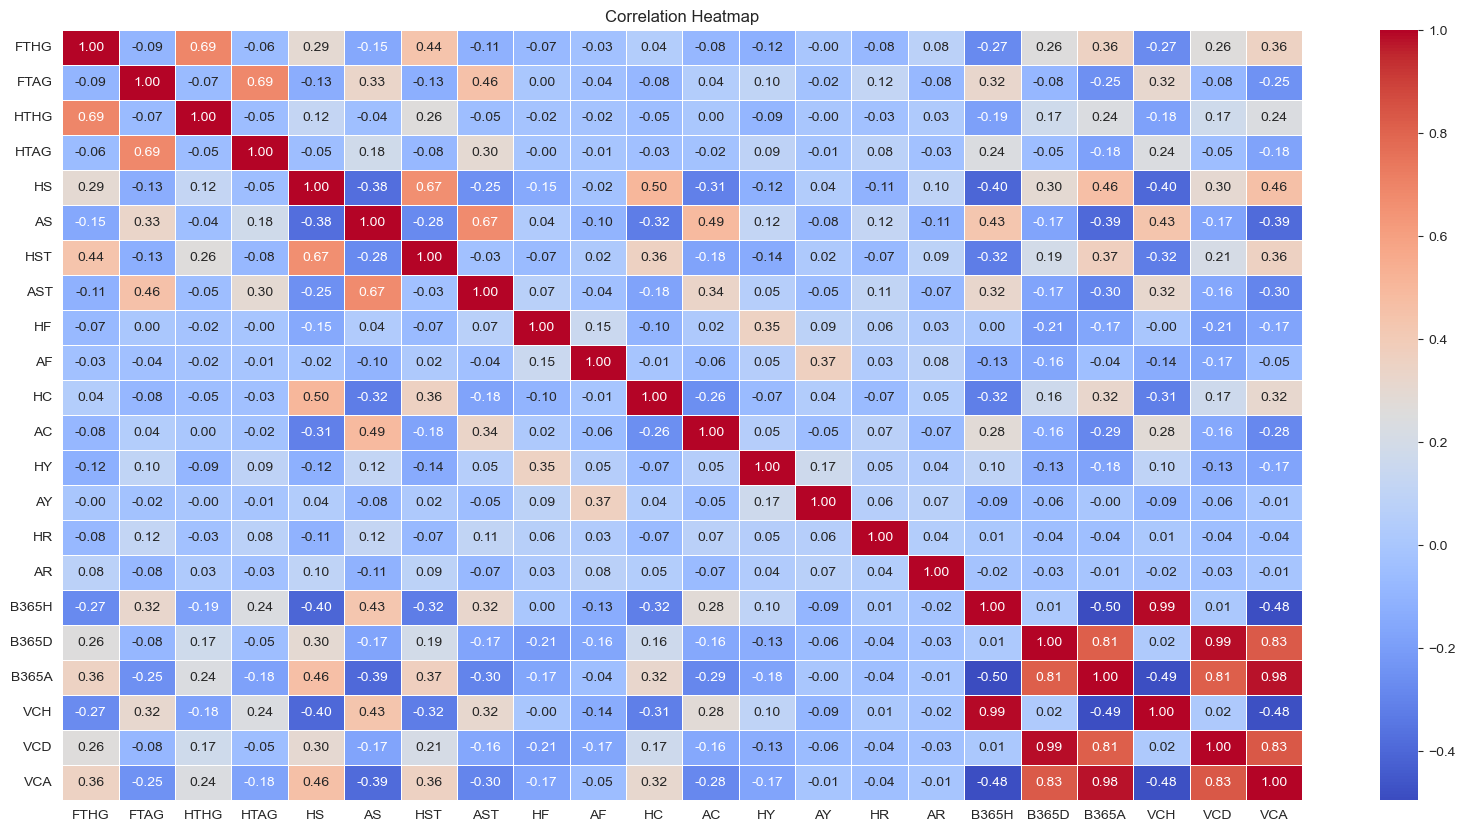

In [11]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

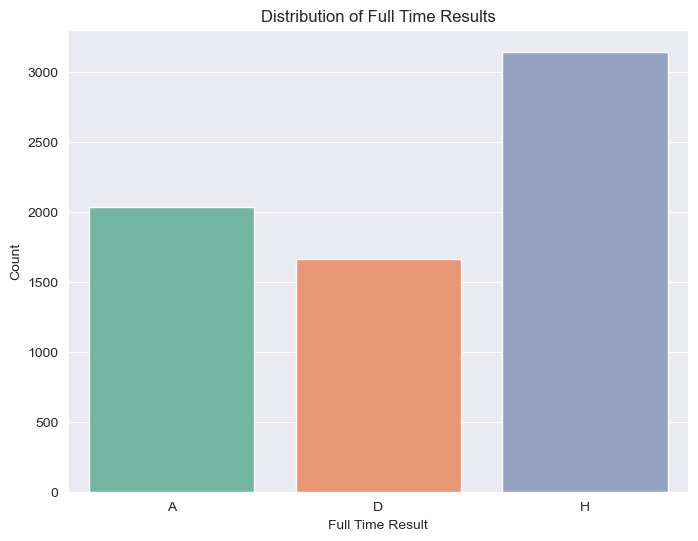

In [12]:
#Distribution of FTR
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='FTR', palette='Set2')
plt.title('Distribution of Full Time Results')
plt.xlabel('Full Time Result')
plt.ylabel('Count')
plt.show()

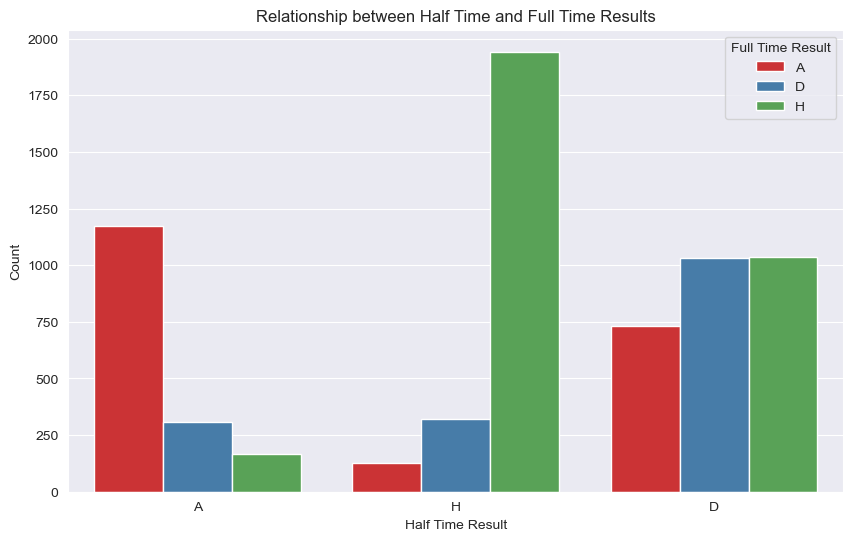

In [13]:
# Relation between HTR and FTR
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='HTR', hue='FTR', palette='Set1')
plt.title('Relationship between Half Time and Full Time Results')
plt.xlabel('Half Time Result')
plt.ylabel('Count')
plt.legend(title='Full Time Result')
plt.show()

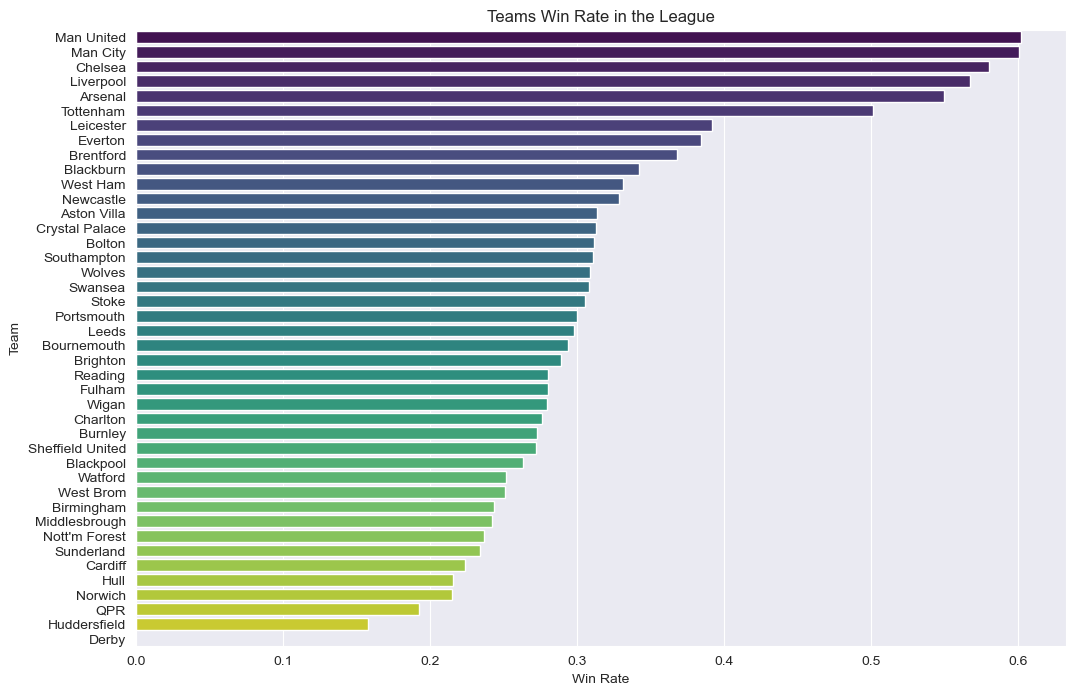

In [14]:
# Calculate total matches for each team
home_team_counts = df['HomeTeam'].value_counts()
away_team_counts = df['AwayTeam'].value_counts()

# Combine the counts for home and away teams to get total matches
total_matches = home_team_counts.add(away_team_counts, fill_value=0)

total_wins = df[df['FTR'] == 'H']['HomeTeam'].value_counts() + df[df['FTR'] == 'A']['AwayTeam'].value_counts()

win_rate = total_wins / total_matches

# Create DataFrame for win rate
team_stats = pd.DataFrame({'Team': win_rate.index, 'WinRate': win_rate.values})

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=team_stats.sort_values(by='WinRate', ascending=False), x='WinRate', y='Team', palette='viridis')
plt.title('Teams Win Rate in the League')
plt.xlabel('Win Rate')
plt.ylabel('Team')
plt.show()

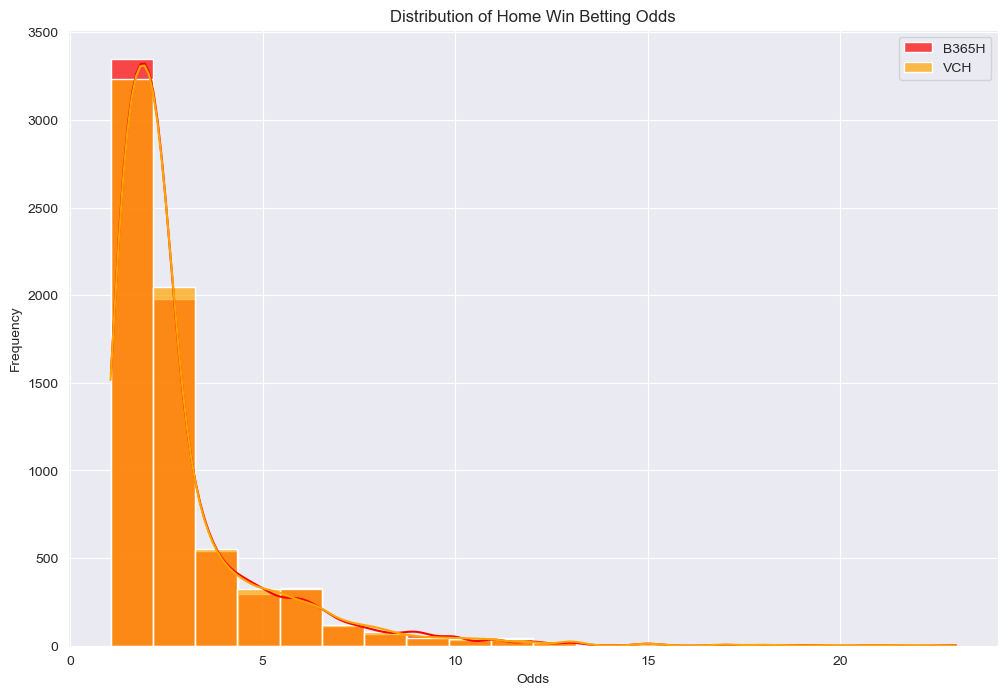

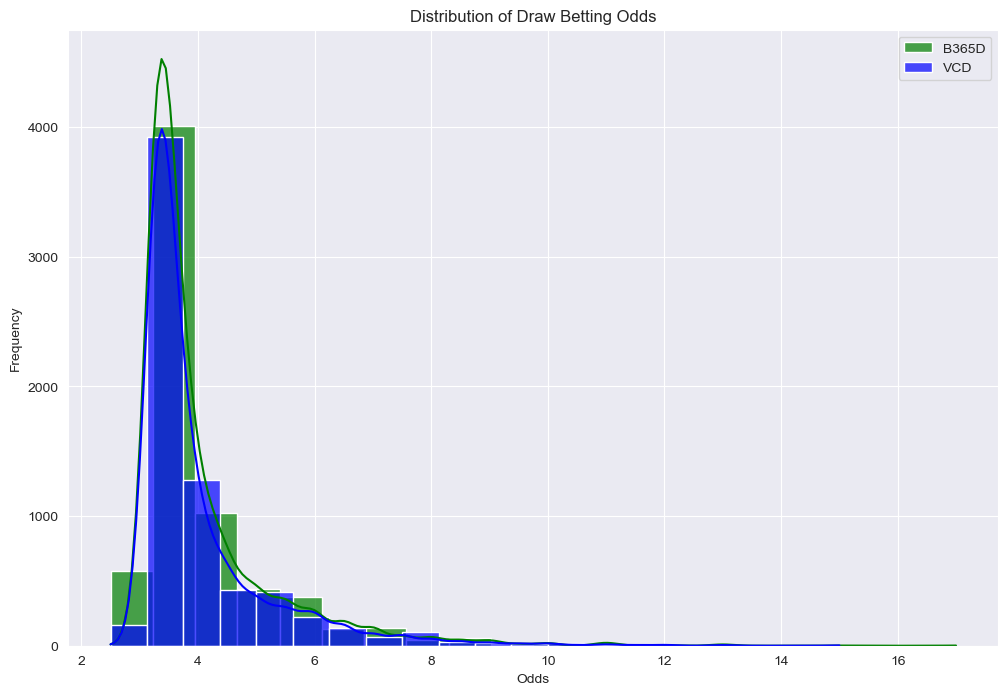

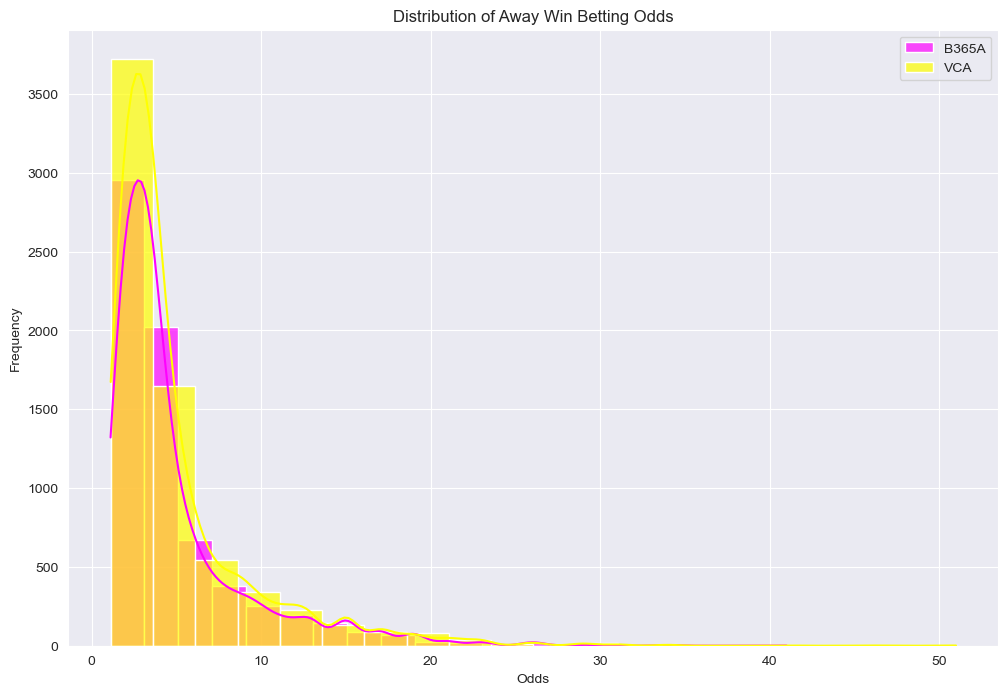

In [15]:
home_colors = ['red', 'orange', 'purple']
draw_colors = ['green', 'blue', 'cyan']
away_colors = ['magenta', 'yellow', 'black']

home_odds_columns = ['B365H', 'VCH']  # Example columns for home win odds
draw_odds_columns = ['B365D', 'VCD']  # Example columns for draw odds
away_odds_columns = ['B365A', 'VCA']

# Plot histograms for home win odds
plt.figure(figsize=(12, 8))
for i, column in enumerate(home_odds_columns):
    sns.histplot(df[column], bins=20, kde=True, label=column, alpha=0.7, color=home_colors[i])
plt.title('Distribution of Home Win Betting Odds')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histograms for draw odds
plt.figure(figsize=(12, 8))
for i, column in enumerate(draw_odds_columns):
    sns.histplot(df[column], bins=20, kde=True, label=column, alpha=0.7, color=draw_colors[i])
plt.title('Distribution of Draw Betting Odds')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histograms for away win odds
plt.figure(figsize=(12, 8))
for i, column in enumerate(away_odds_columns):
    sns.histplot(df[column], bins=20, kde=True, label=column, alpha=0.7, color=away_colors[i])
plt.title('Distribution of Away Win Betting Odds')
plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\sindh\AppData\Local\Temp\ipykernel_23764\2433747941.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


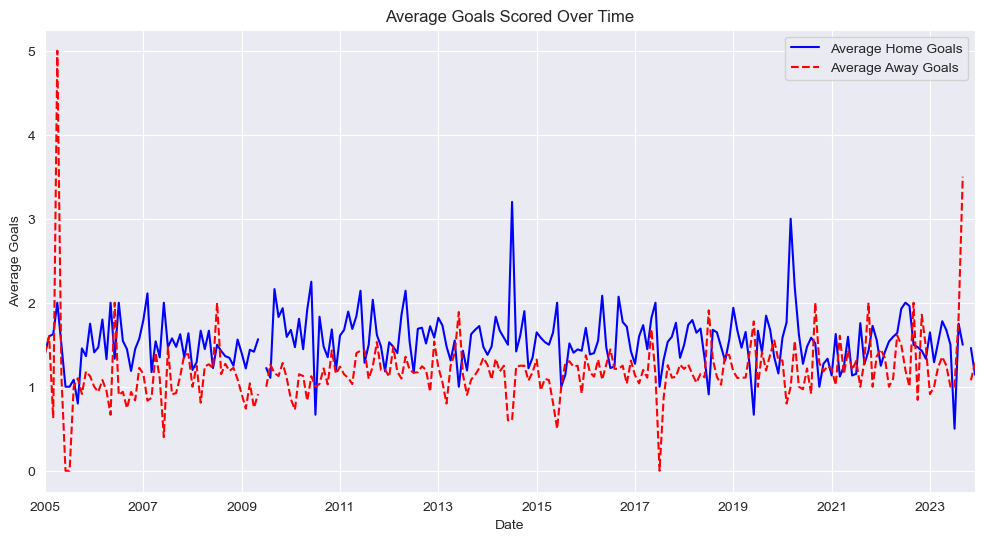

In [16]:
# Average goals over time
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
df.set_index('Date')['FTHG'].resample('M').mean().plot(label='Average Home Goals', color='blue', linestyle='-')
df.set_index('Date')['FTAG'].resample('M').mean().plot(label='Average Away Goals', color='red', linestyle='--')
plt.title('Average Goals Scored Over Time')
plt.xlabel('Date')
plt.ylabel('Average Goals')
plt.legend()
plt.show()


C:\Users\sindh\AppData\Local\Temp\ipykernel_23764\4178010009.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_metrics = df.groupby('HomeTeam').mean()
C:\Users\sindh\AppData\Local\Temp\ipykernel_23764\4178010009.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  away_metrics = df.groupby('AwayTeam').mean()


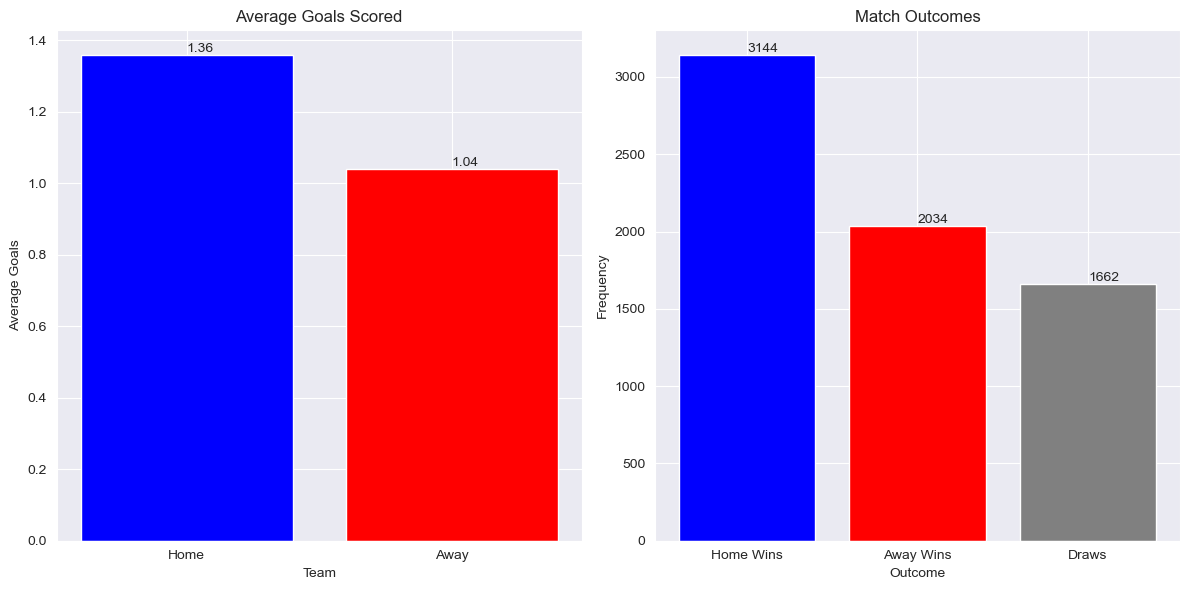

In [17]:
# Calculate average performance metrics for home and away teams
home_metrics = df.groupby('HomeTeam').mean()
away_metrics = df.groupby('AwayTeam').mean()

# Compare average goals scored by home and away teams
average_home_goals = home_metrics['FTHG'].mean()
average_away_goals = away_metrics['FTAG'].mean()

# Analyze match outcomes
home_wins = df[df['FTR'] == 'H']['HomeTeam'].value_counts()
away_wins = df[df['FTR'] == 'A']['AwayTeam'].value_counts()
draws = df[df['FTR'] == 'D'].shape[0]

# Calculate win rate for home and away teams
total_home_matches = df['HomeTeam'].value_counts().sum()
total_away_matches = df['AwayTeam'].value_counts().sum()

home_win_rate = home_wins / total_home_matches
away_win_rate = away_wins / total_away_matches

plt.figure(figsize=(12, 6))

# Plot average goals scored
# Plot average goals scored
plt.subplot(1, 2, 1)
bars = plt.bar(['Home', 'Away'], [average_home_goals, average_away_goals], color=['blue', 'red'])
plt.title('Average Goals Scored')
plt.xlabel('Team')
plt.ylabel('Average Goals')

# Annotate the bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Plot match outcomes
plt.subplot(1, 2, 2)
bars = plt.bar(['Home Wins', 'Away Wins', 'Draws'], [home_wins.sum(), away_wins.sum(), draws], color=['blue', 'red', 'gray'])
plt.title('Match Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

# Annotate the bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.tight_layout()
plt.show()


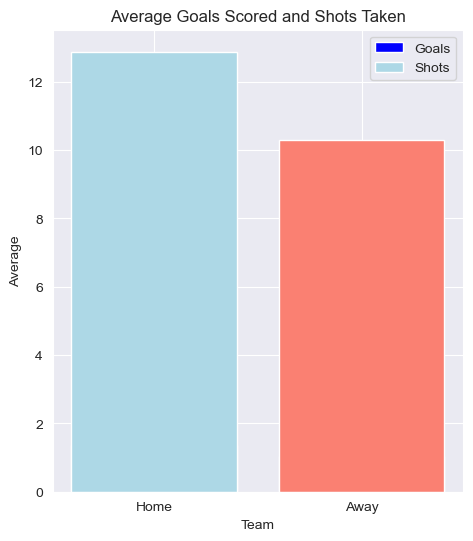

In [18]:
# Shots metric comparision
average_home_shots = home_metrics['HS'].mean()
average_away_shots = away_metrics['AS'].mean()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.bar(['Home', 'Away'], [average_home_goals, average_away_goals], color=['blue', 'red'], label='Goals')
plt.bar(['Home', 'Away'], [average_home_shots, average_away_shots], color=['lightblue', 'salmon'], label='Shots')
plt.title('Average Goals Scored and Shots Taken')
plt.xlabel('Team')
plt.ylabel('Average')
plt.legend()

In [19]:
#Dropping Date as its not required
columns_to_drop = ['Date']
df = df.drop(columns = columns_to_drop)

In [20]:
# Columns remaining
df.columns

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'B365H', 'B365D', 'B365A', 'VCH', 'VCD', 'VCA'],
      dtype='object')

In [21]:
# Dropping columns that won't be required to predict FTR as there might be data leakage
df.drop(columns=['FTHG', 'FTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'], inplace=True)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'HomeTeam' and 'AwayTeam' columns
df['HomeTeam'] = label_encoder.fit_transform(df['HomeTeam'])
df['AwayTeam'] = label_encoder.transform(df['AwayTeam'])

In [23]:
#Data Splitting
from sklearn.model_selection import train_test_split

X = df.drop('FTR', axis=1) 

y = df['FTR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the logistic regression model
model = LogisticRegression(random_state=42, max_iter=10000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.64546783625731

Classification Report:
              precision    recall  f1-score   support

           A       0.63      0.71      0.67       385
           D       0.44      0.23      0.30       341
           H       0.70      0.83      0.76       642

    accuracy                           0.65      1368
   macro avg       0.59      0.59      0.58      1368
weighted avg       0.62      0.65      0.62      1368


Confusion Matrix:
[[275  44  66]
 [104  77 160]
 [ 56  55 531]]


In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5328947368421053

Classification Report:
              precision    recall  f1-score   support

           A       0.54      0.58      0.56       385
           D       0.29      0.28      0.29       341
           H       0.65      0.64      0.65       642

    accuracy                           0.53      1368
   macro avg       0.49      0.50      0.50      1368
weighted avg       0.53      0.53      0.53      1368


Confusion Matrix:
[[222  89  74]
 [ 98  95 148]
 [ 89 141 412]]


In [26]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the random forest classifier
model = RandomForestClassifier(random_state=4)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6067251461988304

Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.69      0.64       385
           D       0.36      0.24      0.29       341
           H       0.69      0.75      0.72       642

    accuracy                           0.61      1368
   macro avg       0.55      0.56      0.55      1368
weighted avg       0.58      0.61      0.59      1368


Confusion Matrix:
[[264  57  64]
 [109  82 150]
 [ 70  88 484]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Choosing the best parameter after hyperparameter tuning
best_model = RandomForestClassifier(bootstrap=True, max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=4)

# Retrain the model on the full training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.6374269005847953

Classification Report:
              precision    recall  f1-score   support

           A       0.62      0.69      0.65       385
           D       0.42      0.30      0.35       341
           H       0.72      0.79      0.75       642

    accuracy                           0.64      1368
   macro avg       0.59      0.59      0.58      1368
weighted avg       0.62      0.64      0.62      1368


Confusion Matrix:
[[267  62  56]
 [104 101 136]
 [ 61  77 504]]


In [28]:
# Support Vector Classification
from sklearn.svm import SVC

# Instantiate the SVM classifier
model = SVC(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6162280701754386

Classification Report:
              precision    recall  f1-score   support

           A       0.62      0.70      0.65       385
           D       0.00      0.00      0.00       341
           H       0.62      0.90      0.73       642

    accuracy                           0.62      1368
   macro avg       0.41      0.53      0.46      1368
weighted avg       0.46      0.62      0.53      1368


Confusion Matrix:
[[268   0 117]
 [100   0 241]
 [ 67   0 575]]


C:\Users\sindh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sindh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sindh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
